In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('/Users/changxu/Desktop/DS/scoreFull.csv')

In [4]:
df['countryPair'] = df['countryPair'].apply(lambda x: '-'.join(sorted(x.split('-'))))
df = df.drop_duplicates(subset='countryPair')

In [5]:
df.set_index(df.iloc[:, 0], inplace=True)
df = df.iloc[:, 1:]

In [6]:
df.columns = pd.to_datetime(df.columns).strftime('%Y/%m')

In [7]:
sum_by_month = df.groupby(df.columns, axis=1).sum()

In [8]:
accumulated_sum = sum_by_month.cumsum(axis=1)
accumulated_sum.head()

,1991/01,1991/02,1991/03,1991/04,1991/05,1991/06,1991/07,1991/08,1991/09,1991/10,...,2021/03,2021/04,2021/05,2021/06,2021/07,2021/08,2021/09,2021/10,2021/11,2021/12
countryPair,,,,,,,,,,,,,,,,,,,,,
USA-USA,0,0,0,0,0,0,0,0,0,0,...,2281,2281,2281,2281,2281,2281,2281,2281,2281,2349
CAN-USA,0,0,0,0,0,0,0,0,0,0,...,715,715,715,715,715,715,715,715,715,747
BHM-USA,0,0,0,0,0,0,0,0,0,0,...,-810,-810,-810,-810,-810,-810,-810,-810,-810,-840
CUB-USA,0,0,0,0,0,0,0,0,0,0,...,-1426,-1426,-1426,-1426,-1426,-1426,-1426,-1426,-1426,-1474
HAI-USA,0,0,0,0,0,0,0,0,0,0,...,-674,-674,-674,-674,-674,-674,-674,-674,-674,-698


In [9]:
import matplotlib.pyplot as plt

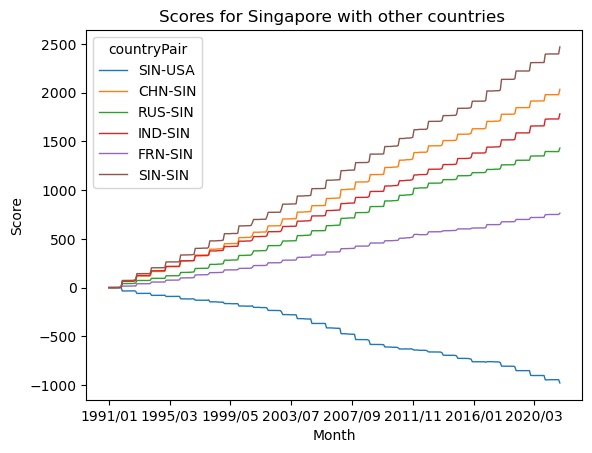

In [35]:
selected_pairs_sin = ["SIN-USA","CHN-SIN","RUS-SIN","IND-SIN","FRN-SIN","SIN-SIN"]
selected_data_sin = accumulated_sum.loc[selected_pairs_sin]
ax=selected_data_sin.T.plot(kind='line', linestyle='-',linewidth=1)
plt.xlabel('Month')
plt.ylabel('Score')
plt.title('Scores for Singapore with other countries ')
plt.show()

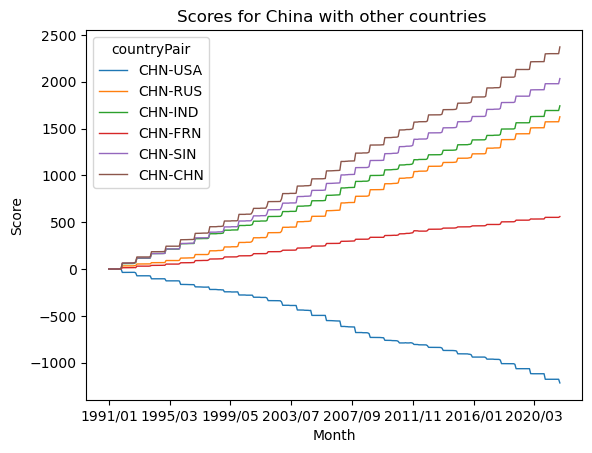

In [37]:
selected_pairs_chn = ["CHN-USA","CHN-RUS","CHN-IND","CHN-FRN","CHN-SIN","CHN-CHN"]
selected_data_chn = accumulated_sum.loc[selected_pairs_chn]
ax=selected_data_chn.T.plot(kind='line', linestyle='-',linewidth=1)
plt.xlabel('Month')
plt.ylabel('Score')
plt.title('Scores for China with other countries ')
plt.show()

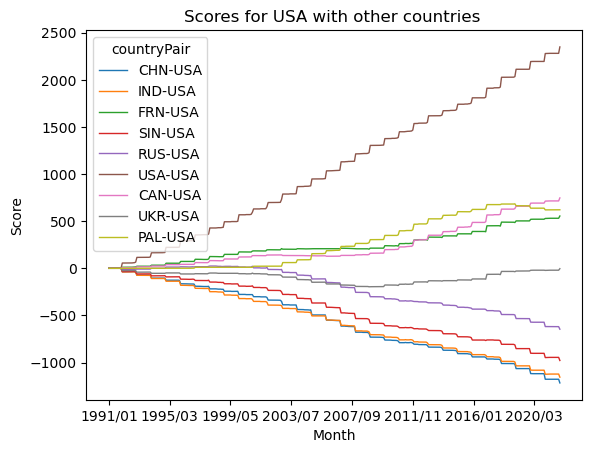

In [13]:
selected_pairs_usa = ["CHN-USA","IND-USA","FRN-USA","SIN-USA","RUS-USA","USA-USA","CAN-USA","UKR-USA","PAL-USA"]
selected_data_usa = accumulated_sum.loc[selected_pairs_usa]
selected_data_usa.T.plot(kind='line', linestyle='-',linewidth=1)
plt.xlabel('Month')
plt.ylabel('Score')
plt.title('Scores for USA with other countries ')
plt.show()

In [40]:
accumulated_sum.to_csv("/Users/changxu/Desktop/DS/accumulated_scores_monthly_basis.csv")

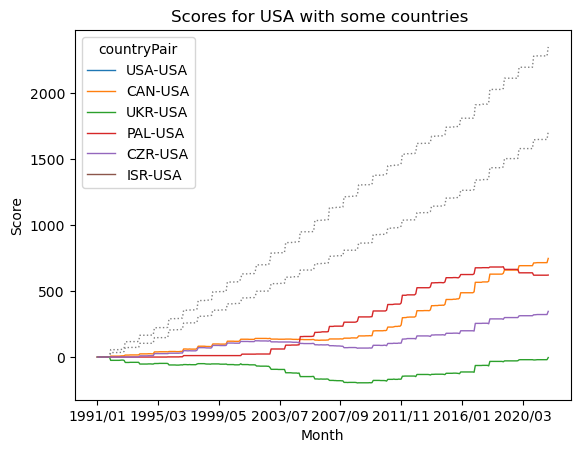

In [39]:
selected_pairs_usa2 = ["USA-USA","CAN-USA","UKR-USA","PAL-USA","CZR-USA","ISR-USA"]
selected_data_usa2 = accumulated_sum.loc[selected_pairs_usa2]
ax=selected_data_usa2.T.plot(kind='line', linestyle='-',linewidth=1)
ax.lines[0].set_color('grey')  
ax.lines[0].set_linestyle('dotted')  
ax.lines[5].set_color('grey')  
ax.lines[5].set_linestyle('dotted') 
plt.xlabel('Month')
plt.ylabel('Score')
plt.title('Scores for USA with some countries ')
plt.show()

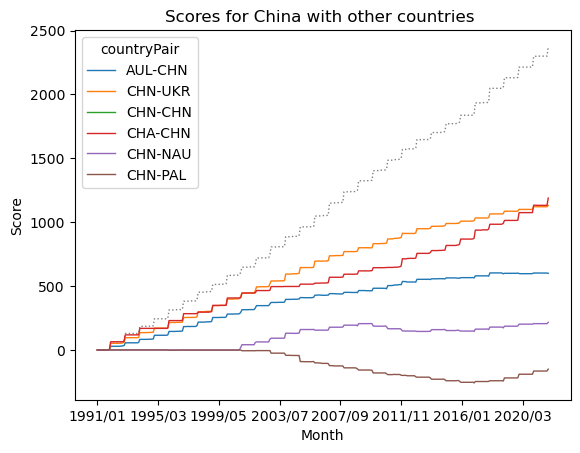

In [32]:
selected_pairs_chn = ["AUL-CHN","CHN-UKR","CHN-CHN","CHA-CHN","CHN-NAU","CHN-PAL"]
selected_data_chn = accumulated_sum.loc[selected_pairs_chn]
ax=selected_data_chn.T.plot(kind='line', linestyle='-',linewidth=1)
ax.lines[2].set_color('grey')  
ax.lines[2].set_linestyle('dotted')  
plt.xlabel('Month')
plt.ylabel('Score')
plt.title('Scores for China with other countries ')
plt.show()